In [27]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
from neuraltda import TPLCP
reload(TPLCP)

<module 'neuraltda.TPLCP' from '/home/brad/code/NeuralTDA/neuraltda/TPLCP.py'>

In [28]:
block_path = '/home/brad/krista/B1075/P01S03/'
block_path = '/home/brad/krista/B1083/P03S03/'
bdf = glob.glob('/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned')[0]

birds = ['B1083', 'B1075', 'B1235']

bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/', 'B1235': '/home/brad/krista/B1235/P02S01/'}

# Stim classes
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1075_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}
B1087_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1235_classes = {'E_scaled_burung': 'R', 'F_scaled_burung':'L', 'G_scaled_burung':'R', 'H_scaled_burung':'L'}

stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1083_stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1075_stims = ['E_40k', 'F_40k', 'G_40k', 'H_40k']
B1235_stims = ['E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung']

stim_classes = {'B1083': B1083_classes, 'B1075': B1075_classes, 'B1235': B1235_classes}
bird_stims = {'B1083': B1083_stims, 'B1075': B1075_stims, 'B1235': B1235_stims}

In [29]:
winsize = 25.0
dtovr = winsize*0.0
comment = 'ForLogisticPred'
segment_info = [0,0]

bdfs = []
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, winsize, segment_info, cluster_group=['Good'], dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs.append([bird, bdf])

Data Not already binned
/home/brad/krista/B1083/P03S03/binned_data/win-25.0_dtovr-0.0_seg-0-0-ForLogisticPred/20170724T203514Z-25.0-0.0.binned
Data Not already binned
/home/brad/krista/B1075/P01S03/binned_data/win-25.0_dtovr-0.0_seg-0-0-ForLogisticPred/20170724T203524Z-25.0-0.0.binned
Data Not already binned
/home/brad/krista/B1235/P02S01/binned_data/win-25.0_dtovr-0.0_seg-0-0-ForLogisticPred/20170724T203529Z-25.0-0.0.binned


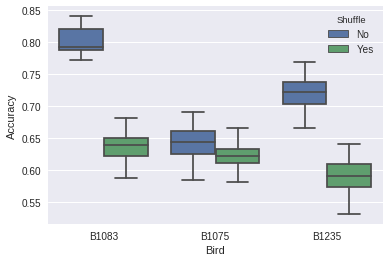

In [31]:
# Behavioral class decoder accuracy vs shuffled. 

reload(tp2)
analysis_id = 'test'
thresh = 4.0
nperms = 20
ncellsperm = 30
dim = 2
Ntimes = 10
twin = np.linspace(0, 6000, Ntimes)
p_test = 0.2
N_tests = 30

acframe = pd.DataFrame(columns=['Bird', 'Accuracy', 'Shuffle'])
for b in bdfs:
    bird = b[0]
    bdf = b[1]
    stimc = stim_classes[bird]
    stims = bird_stims[bird]
    (bc2, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 2, twin, winsize, dtovr)
    (bc1, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 1, twin, winsize, dtovr)
    (bc0, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 0, twin, winsize, dtovr)
    (bc3, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 3, twin, winsize, dtovr)
    

    (bc2s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 2, twin, winsize, dtovr, shuffle=True)
    (bc1s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 1, twin, winsize, dtovr, shuffle=True)
    (bc0s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 0, twin, winsize, dtovr, shuffle=True)
    (bc3s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 3, twin, winsize, dtovr, shuffle=True)
    
    

    accuracies = TPLCP.predict_stimuli_classes([bc1, bc2, bc0, bc3], Ntimes, stims, stimc, p_test, N_tests)
    accuracies_shuff = TPLCP.predict_stimuli_classes([bc1s, bc2s, bc0s, bc3s], Ntimes, stims, stimc, p_test, N_tests)
    acframeapp = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies, 'Shuffle': N_tests*['No'] })
    acframeapps = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies_shuff, 'Shuffle': N_tests*['Yes'] })
    acframe = acframe.append(acframeapp)
    acframe = acframe.append(acframeapps)
    
plt.figure()
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe)

In [12]:
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1083_unfclasses = {'I_40k': 'L', 'J_40k': 'R', 'K_40k': 'L', 'L_40k':'R'}

B1075_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}
B1087_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1235_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}

stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
unfstims = ['I_40k', 'J_40k', 'K_40k', 'L_40k']

accuracies = TPLCP.predict_stimuli_classes([bc1, bc2, bc0], Ntimes, stims, B1083_classes, p_test, N_tests)
print(np.mean(accuracies))

unfacc = TPLCP.predict_stimuli_classes([bc1, bc2, bc0], Ntimes, unfstims, B1083_unfclasses, p_test, N_tests)
print(np.mean(unfacc))

0.865
0.792083333333


In [13]:
# Decode stimulus name
B1083_classes = {'M_40k': 'A', 'N_40k':'B', 'O_40k':'C', 'P_40k':'D',
                 'I_40k': 'E', 'J_40k': 'F', 'K_40k': 'G', 'L_40k':'H'}
B1083_unfclasses = {}
stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k', 'I_40k', 'J_40k', 'K_40k', 'L_40k']

accuracies = TPLCP.predict_stimuli_classes([bc1, bc2, bc0], Ntimes, stims, B1083_classes, 0.1, 30)
print(np.mean(accuracies))


0.669791666667


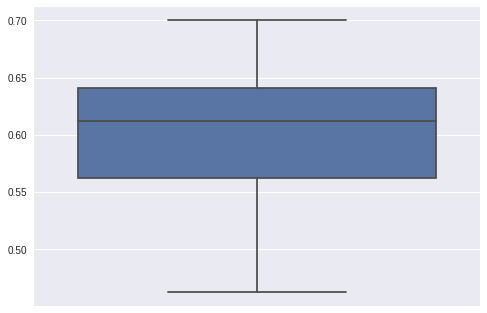

In [23]:
    plt.figure()
    sns.boxplot( y = [accuracies, accuracies_shuff])